## Final Project Submission

Please fill out:
* Student name: Isabella Siele
* Student pace:  full time
* Scheduled project review date/time: 3/10/2025
* Instructor name: Samuel Karu
* Blog post URL:


# Aviation Accident Risk Analysis
## 1.Overview

The company is planning to expand into the aviation industry to diversify its portfolio. The idea is to purchase and operate aircraft for commercial and private use. The project will thus use data to provide insights and guide on decisions to make by cleaning, analysing and visualizations.

## 2.Problem Statement

The company does not have much information on aviation safety or accident patterns. This may expose the business to unnecessary risks like financial losses and safety concerns.Thus the  project aims to determine which aircraft has the lowest risk for the company to start this new business and what factors to consider which influence the occurence of accidents. 

## 3.Objectives

This project will focus on answering three main questions:

-Which aircraft make and categories have the lowest accident and fatality rates?It helps to identify safe aircraft types to prioritize during purchase.

-What outside factors(Weather conditions)play the biggest role  in accidents?

-How does the purpose of flight(commercial)affect accident risks?



## Data Understanding

In [2]:
# Importing needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# loading data
df = pd.read_csv(".\data\Aviation_Data.csv")

c:\Users\user\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Top 5 rows in the dataset
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [5]:
# last 5 rows in the dataset
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90347,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


In [6]:
# Shows Number of rows and columns in dataset
df.shape

(90348, 31)

In [7]:
# Info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [8]:
# Columns in dataset
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [9]:
# The datatypes in columns
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

## Data Preparation

In [10]:
# checking for missing values
df.isna().sum().sort_values(ascending=False)

Schedule                  77766
Air.carrier               73700
FAR.Description           58325
Aircraft.Category         58061
Longitude                 55975
Latitude                  55966
Airport.Code              40099
Airport.Name              37558
Broad.phase.of.flight     28624
Publication.Date          16689
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Fatal.Injuries      12860
Engine.Type                8536
Report.Status              7840
Purpose.of.flight          7651
Number.of.Engines          7543
Total.Uninjured            7371
Weather.Condition          5951
Aircraft.damage            4653
Registration.Number        2776
Injury.Severity            2459
Country                    1685
Amateur.Built              1561
Model                      1551
Make                       1522
Location                   1511
Event.Date                 1459
Accident.Number            1459
Event.Id                   1459
Investigation.Type            0
dtype: i

In [11]:
# Dropping the first five because alot of data is missing
df.drop(columns=["Schedule","Air.carrier","FAR.Description","Longitude","Latitude"], inplace=True)

In [12]:
# Select columns which will be used
use_columns = [
    "Make","Event.Date",
    "Model",
    "Injury.Severity",
    "Total.Fatal.Injuries",
    "Total.Serious.Injuries",
    "Total.Minor.Injuries",
    "Total.Uninjured",
    "Purpose.of.flight",
    "Weather.Condition","Broad.phase.of.flight"
]

In [13]:
#nMissing values in the selected columns
missing_count = df[use_columns].isnull().sum()
missing_percentage = df[use_columns].isnull().mean()

# Combine to a dataframe
missing = pd.DataFrame({
    "Missing Count": missing_count,
    "Missing Percentage": missing_percentage
})
missing

,Missing Count,Missing Percentage
Make,1522,0.016846
Event.Date,1459,0.016149
Model,1551,0.017167
Injury.Severity,2459,0.027217
Total.Fatal.Injuries,12860,0.142339
Total.Serious.Injuries,13969,0.154613
Total.Minor.Injuries,13392,0.148227
Total.Uninjured,7371,0.081585
Purpose.of.flight,7651,0.084684
Weather.Condition,5951,0.065868


In [14]:
# Dropping missing values in Make, Model,Purpose of flight,Weather condition,broad phase of flight
df.dropna(subset=["Make","Model","Purpose.of.flight","Weather.Condition","Broad.phase.of.flight"], inplace=True)

In [15]:
# Fill injury columns blanks with 0
injury_columns = [
    "Total.Fatal.Injuries", "Total.Serious.Injuries", 
            "Total.Minor.Injuries", "Total.Uninjured"
]
df[injury_columns] = df[injury_columns].fillna(0)

In [16]:
# Changing injury columns datatype to integer
df[injury_columns] = df[injury_columns].astype(int)

In [17]:
# Recheck missing values 
df[use_columns].isna().sum().sort_values(ascending=False) 

Broad.phase.of.flight     0
Weather.Condition         0
Purpose.of.flight         0
Total.Uninjured           0
Total.Minor.Injuries      0
Total.Serious.Injuries    0
Total.Fatal.Injuries      0
Injury.Severity           0
Model                     0
Event.Date                0
Make                      0
dtype: int64

In [18]:
# Changing the categorical columns datatype to string 
df[["Make","Model","Purpose.of.flight","Weather.Condition","Broad.phase.of.flight"]] = df[[ "Make","Model","Purpose.of.flight","Weather.Condition","Broad.phase.of.flight"]].astype(str)

In [19]:
# Convert date columns to datetime
df['Event.Date'] = pd.to_datetime(df['Event.Date'], errors='coerce')
df['Publication.Date'] = pd.to_datetime(df['Publication.Date'], errors='coerce')
df["Event.Date"].dtypes

dtype('<M8[ns]')

In [20]:
# Checking for duplicates
df.duplicated().value_counts()

False    60551
dtype: int64

In [21]:
# Dropping duplicated values
df.drop_duplicates(inplace=True)

In [22]:
# Ensuring duplicates were dropped
df.duplicated().value_counts()

False    60551
dtype: int64

In [23]:
# Making all to be uppercase and stripping spaces
df["Purpose.of.flight"] = df["Purpose.of.flight"].astype(str).str.upper().str.strip()

In [24]:
# Regrouping the purpose of flight
df["Purpose.of.flight"] = df["Purpose.of.flight"].replace({
    "BUSINESS": "COMMERCIAL","EXECUTIVE/CORPORATE":"COMMERCIAL",
    "PUBS":"COMMERCIAL","PUBL":"COMMERCIAL",
    "AIR RACE/SHOW":"AIR SHOW","AIR RACE SHOW":"AIR SHOW",
    "PUBLIC AIRCRAFT _ LOCAL":"PUBLIC AIRCRAFT",
    "PUBLIC AIRCRAFT - STATE":"PUBLIC AIRCRAFT",
    "PUBLIC AIRCRAFT - LOCAL":"PUBLIC AIRCRAFT",
    "PUBLIC AIRCRAFT - FEDERAL":"PUBLIC AIRCRAFT"})

In [25]:
# Regrouping manufacturers of aircrafts
df["Make"] = df["Make"].replace({"BOMBARDIER":"BOMBARDIER INC"})

In [26]:
# Getting year using the event date
df["Year"] = df["Event.Date"].dt.year

In [27]:
# Calculating fatality rate and creating a new column Fatality rate
# Fatality rate = [Total Fatal Injuries]/ [Total Aboard]
df['Total.Aboard'] = (
    df['Total.Fatal.Injuries'] +df['Total.Serious.Injuries'] +
    df['Total.Minor.Injuries'] +df['Total.Uninjured'])

df['Fatality.Rate'] = df['Total.Fatal.Injuries'] / df['Total.Aboard']

In [28]:
# Top 5 rows to check if changes were implemented
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Airport.Code,Airport.Name,Injury.Severity,Aircraft.damage,...,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Total.Aboard,Fatality.Rate
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,Fatal(2),Destroyed,...,0,0,0,UNK,Cruise,Probable Cause,NaT,1948,2,1.000000
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,Fatal(4),Destroyed,...,0,0,0,UNK,Unknown,Probable Cause,1996-09-19,1962,4,1.000000
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,NaN,NaN,Fatal(3),Destroyed,...,0,0,0,IMC,Cruise,Probable Cause,2007-02-26,1974,3,1.000000
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,Fatal(2),Destroyed,...,0,0,0,IMC,Cruise,Probable Cause,2000-12-09,1977,2,1.000000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,Fatal(1),Destroyed,...,2,0,0,VMC,Approach,Probable Cause,1980-04-16,1979,3,0.333333


## Data Analysis

- Distribution of accidents over time

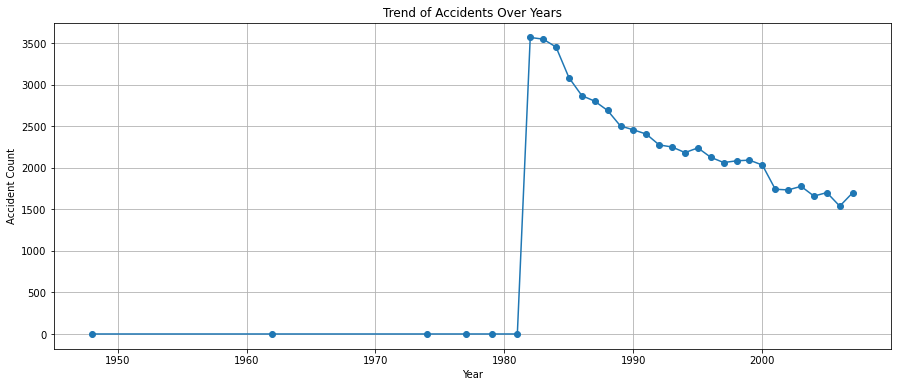

In [29]:
# Accidents by year
accidents_per_year = df["Year"].value_counts().sort_index()

plt.figure(figsize=(15,6))
accidents_per_year.plot(kind="line", marker="o")
plt.title("Trend of Accidents Over Years")
plt.xlabel("Year")
plt.ylabel("Accident Count")
plt.grid(True)
plt.show()

This shows that the number of accidents has been decreasing over the years but the beginning is flat due to no records of accidents early on.

- Distribution of accidents by phase of flight 

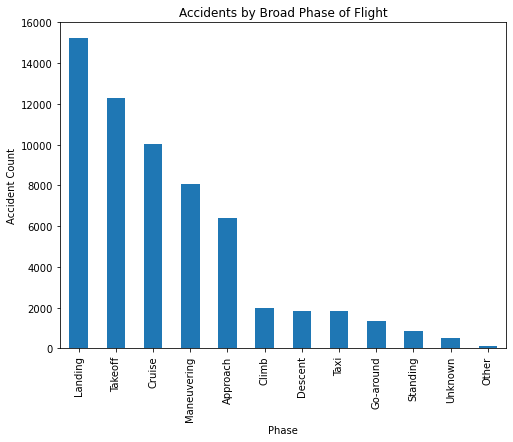

In [30]:
# Accidents by Flight Phase
phase_counts = df["Broad.phase.of.flight"].value_counts()

plt.figure(figsize=(8,6))
phase_counts.plot(kind="bar")
plt.title("Accidents by Broad Phase of Flight")
plt.ylabel("Accident Count")
plt.xlabel("Phase")
plt.show()

Most accidents are seen to occur during the landing phase followed by takeoff then cruise. It means they should increase safety precautions during landing and takeoff.

- Comparison of Accident Counts and Fatalities Across Aircraft Manufacturers

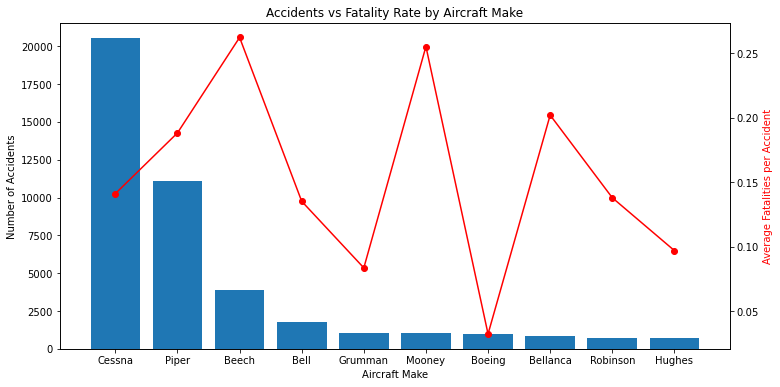

In [31]:
# Top 10 makes with most accidents
top_makes = df['Make'].value_counts().nlargest(10).index
accidents = df['Make'].value_counts().loc[top_makes]

# Average fatalities for the same top makes
fatalities = df.groupby("Make")["Fatality.Rate"].mean().loc[top_makes]

fig, ax1 = plt.subplots(figsize=(12,6))

# Bars (accident counts)
ax1.bar(top_makes, accidents)
ax1.set_xlabel("Aircraft Make")
ax1.set_ylabel("Number of Accidents")

# Second y-axis (fatalities)
ax2 = ax1.twinx()
ax2.plot(top_makes, fatalities, color='red', marker='o',)
ax2.set_ylabel("Average Fatalities per Accident", color='red')

plt.title("Accidents vs Fatality Rate by Aircraft Make")
plt.xticks(rotation=45)
plt.show()


This shows that Cessna has a lot of accidents  but the average fatality per accident is very relatively low .The fatality rate per accident is moderate compared to boeing which has a very low number of accidents but the fatality is very high.

- Accidents and fatalities by purpose of flight

In [32]:
# Group by Purpose of Flight
purpose_stats = df.groupby("Purpose.of.flight").agg(
    accidents=("Event.Id", "count"),
    avg_fatality_rate=("Fatality.Rate", "mean"))

# Filter out categories with very few accidents
purpose_stats = purpose_stats[purpose_stats["accidents"] >= 10]


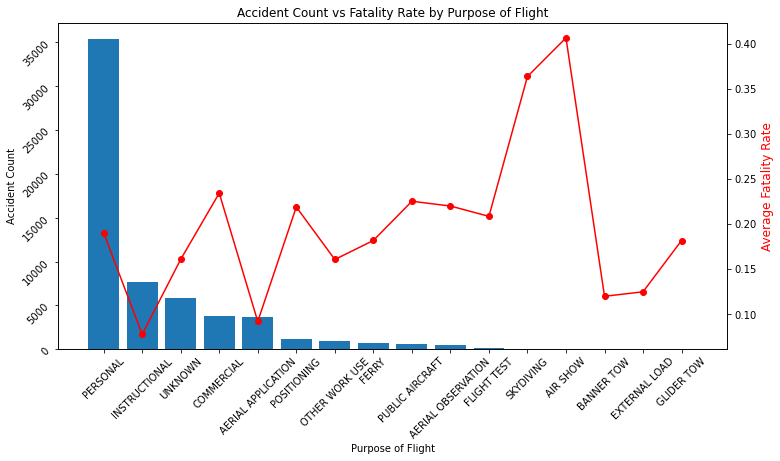

In [33]:
# Sort by accident count in descending order
purpose_stats = purpose_stats.sort_values("accidents", ascending=False)


fig, ax1 = plt.subplots(figsize=(12,6))

bars = ax1.bar(purpose_stats.index, purpose_stats["accidents"],)
ax1.set_ylabel("Accident Count")
ax1.set_xlabel("Purpose of Flight")
ax1.tick_params(rotation=45) 

ax2 = ax1.twinx()
ax2.plot(purpose_stats.index, purpose_stats["avg_fatality_rate"], 
         color="red", marker="o", label="Fatality Rate")
ax2.set_ylabel("Average Fatality Rate", color="red", fontsize=12)

plt.title("Accident Count vs Fatality Rate by Purpose of Flight", )
plt.show()

Personal and instructional flights are seen to have a high number of accidents but a very low fatility rate compared to commercial flights which are seen to have few accidents but a very high fatality rate. This may be due to the large number of passengers in commercial flights compared to private flights.

- Analysis of accidents based on weather condition

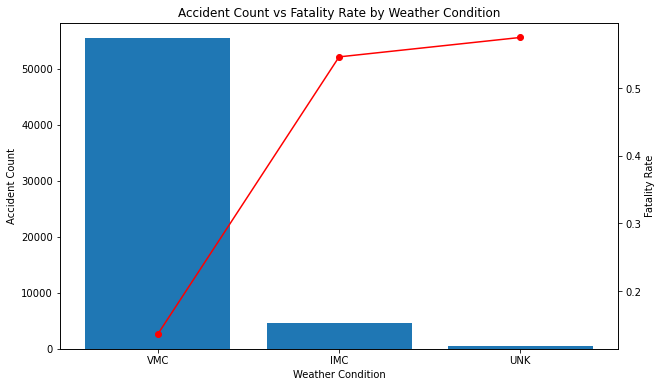

In [34]:
# Group data by weather condition
weather_stats = df.groupby("Weather.Condition").agg(
    accidents=("Event.Id", "count"),
    fatalities=("Total.Fatal.Injuries", "sum"),
    uninjured=("Total.Uninjured", "sum"),
    avg_fatality_rate=("Fatality.Rate", "mean"))

# Sort by accident counts
weather_stats = weather_stats.sort_values("accidents", ascending=False)

fig, ax1 = plt.subplots(figsize=(10,6))
# Bar plot for accident counts
bars = ax1.bar(weather_stats.index, weather_stats["accidents"])
ax1.set_ylabel("Accident Count")
ax1.set_xlabel("Weather Condition")

# Line plot for fatality rate
ax2 = ax1.twinx()
ax2.plot(weather_stats.index, weather_stats["avg_fatality_rate"], color="red", marker="o")
ax2.set_ylabel("Fatality Rate")

plt.title("Accident Count vs Fatality Rate by Weather Condition")
plt.show()


It shows that most accidents occured during VMC which is when most flights are conducted but it has a relatively small fatality rate.It is then shown that most fatalities occured during IMC though it has fewer accidents

In [35]:
# Saving cleaned dataset
df.to_csv("Clean_Aviation_Data.csv", index=False)

